## AUTOMOTIVE ACCIDENT SEVERITY PREDICTION USING MACHINE LEARNING

#### UPLOADING LIBRARIES AND PACKAGES

* GENERAL

In [1]:
import numpy as np
import pandas as pd

* PLOTS, TABS

In [2]:
import matplotlib.pyplot as plt   
from pydotplus import graph_from_dot_data
from IPython.display import Image  
import seaborn as sns
from IPython.display import HTML, display
import tabulate

* RESAMPLING

In [3]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

C:\Users\hp\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\hp\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\hp\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.2

* STANDARDIZATION, PCA ANALYSIS

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

* CROSS- VALIDATION

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

* DECISION TREE/ RANDOM FOREST

In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

* KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

* LOGISTIC REGRESSION

In [8]:
from sklearn.linear_model import LogisticRegression

## READ DATASETS

In [9]:
df1 = pd.read_csv('data/2014 excel.csv')
df2 = pd.read_csv('data/2015 excel.csv')
df3 = pd.read_csv('data/2016 excel.csv')

frames = [df1, df2, df3]
result = pd.concat(frames, axis=0)
result.shape

(7746, 14)

In [10]:
result.dtypes

Reference Number      object
Number of Vehicles     int64
Expr1                 object
Accident Date         object
Day                   object
Time (24hr)            int64
1st Road Class        object
Road Surface          object
Weather Conditions    object
Casualty Class        object
Casualty Severity     object
Sex of Casualty       object
Age of Casualty        int64
Type of Vehicle       object
dtype: object

In [11]:
result["Casualty Severity"] = pd.Categorical(result["Casualty Severity"])

In [12]:
result["1st Road Class"] = pd.Categorical(result["1st Road Class"])

In [13]:
result["Road Surface"]=pd.Categorical(result["Road Surface"])

In [14]:
result["Weather Conditions"] = pd.Categorical(result["Weather Conditions"])

In [15]:
result["Casualty Class"] = pd.Categorical(result["Casualty Class"])

In [16]:
result["Sex of Casualty"]=pd.Categorical(result["Sex of Casualty"])

In [17]:
result["Type of Vehicle"]=pd.Categorical(result["Type of Vehicle"])

In [18]:
result.dtypes

Reference Number        object
Number of Vehicles       int64
Expr1                   object
Accident Date           object
Day                     object
Time (24hr)              int64
1st Road Class        category
Road Surface          category
Weather Conditions    category
Casualty Class        category
Casualty Severity     category
Sex of Casualty       category
Age of Casualty          int64
Type of Vehicle       category
dtype: object

In [19]:
result.head(5)

,Reference Number,Number of Vehicles,Expr1,Accident Date,Day,Time (24hr),1st Road Class,Road Surface,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,12N1424,1,NaN,23/02/2014,Sunday,1840,Unclassified,Dry,Fine without high winds,Driver,Serious,Male,19,Car
1,12N1424,1,NaN,23/02/2014,Sunday,1840,Unclassified,Dry,Fine without high winds,Passenger,Serious,Male,19,Car
2,1380117,1,NaN,08/03/2014,Saturday,130,A,Dry,Fine without high winds,Driver,Serious,Male,21,Car
3,1370105,1,NaN,07/03/2014,Friday,235,Unclassified,Wet or Damp,Fine without high winds,Driver,Slight,Male,23,Car
4,140007543,2,NaN,07/01/2014,Tuesday,240,A(M),Wet or Damp,Fine with high winds,Driver,Serious,Male,60,Goods vehicle 7.5 tonnes mgw and over


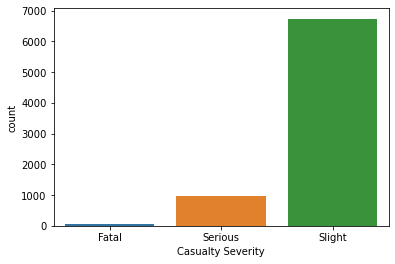

In [20]:
sns.countplot(result["Casualty Severity"])

## EDA

### Univariate

In [21]:
num=result.select_dtypes(include=["float64","int64"])
cat=result.select_dtypes(include=["object","category"]).drop(["Reference Number","Expr1","Accident Date"],axis=1)

C:\Users\hp\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\hp\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\hp\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\hp\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:3

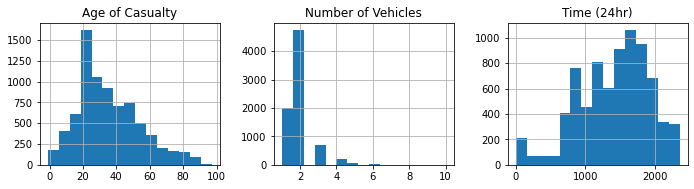

In [22]:
num.hist(bins=15, figsize=(20, 6), layout=(2, 5));

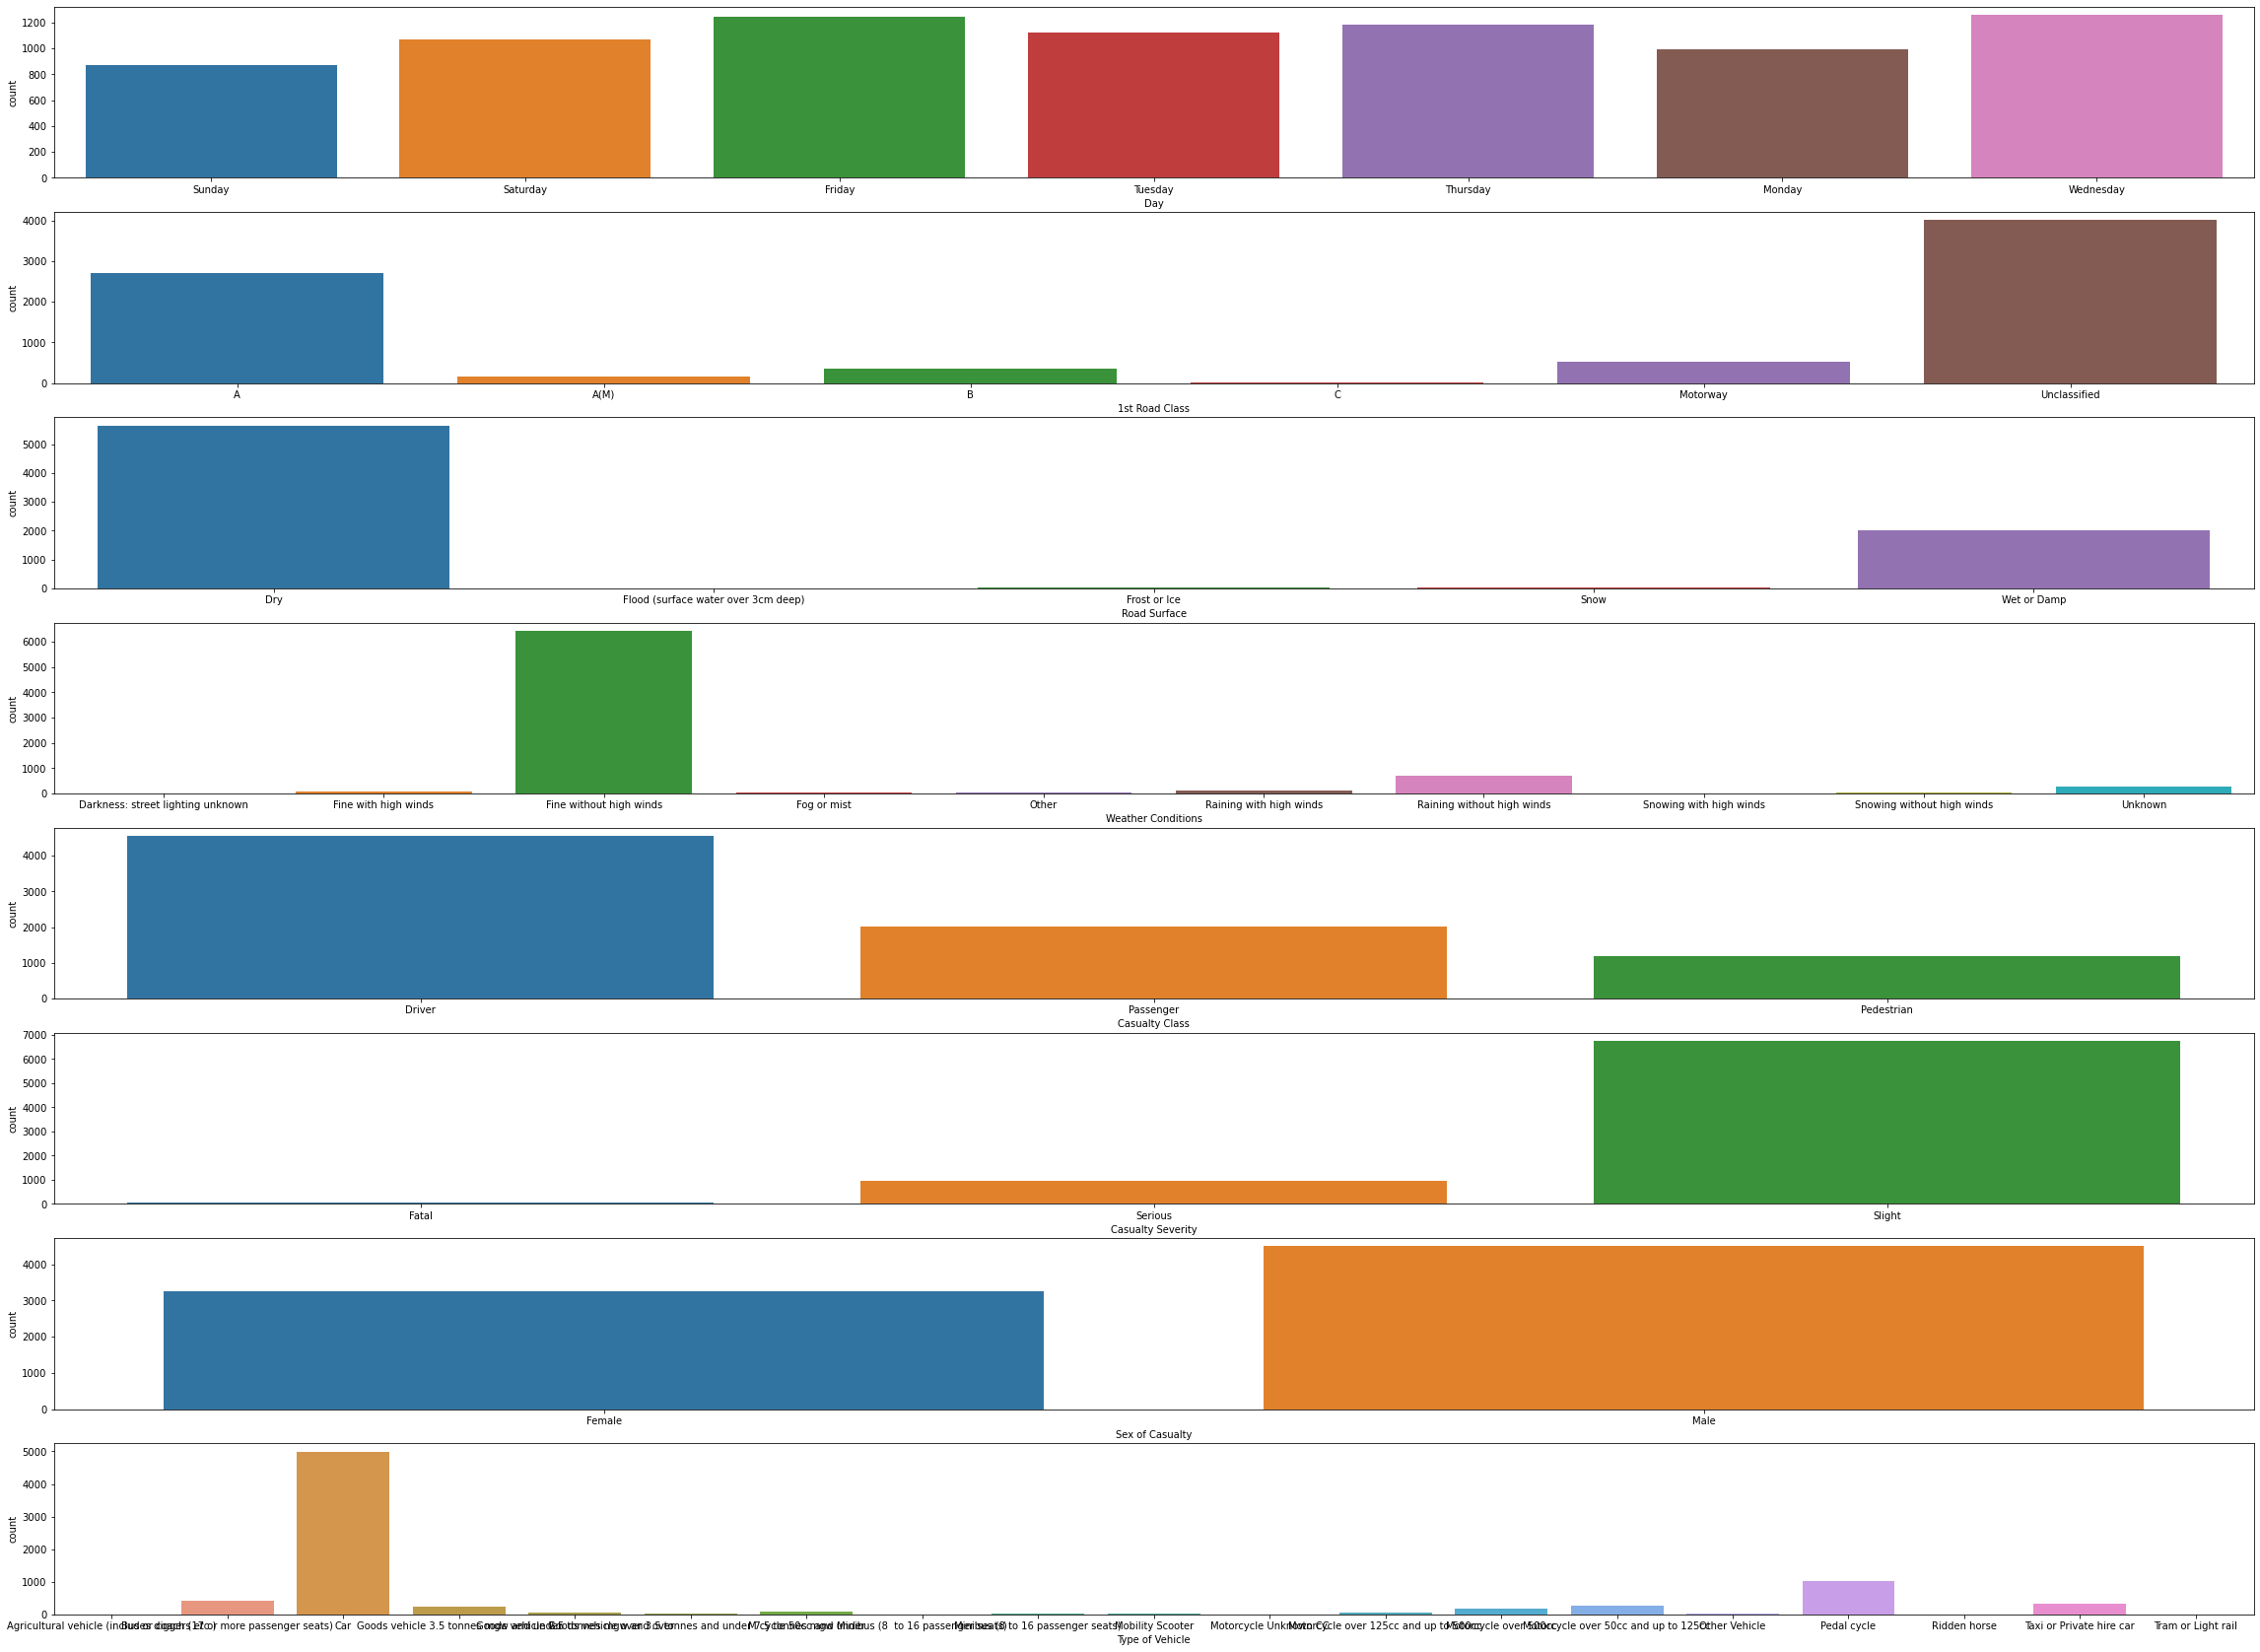

In [23]:
f, ax = plt.subplots(nrows=8,ncols=1,figsize=(40,30))
for i,j in zip(cat.columns.tolist(), ax.flatten()):
    sns.countplot(x=cat[i],ax=j)

# Bivariate

#### 1.For Categorical

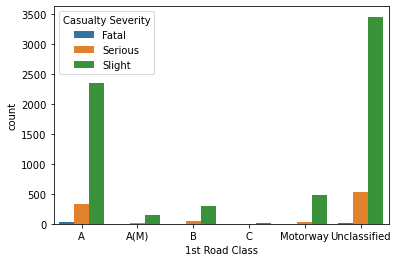

In [24]:
sns.countplot(x=result["1st Road Class"],hue=result["Casualty Severity"])

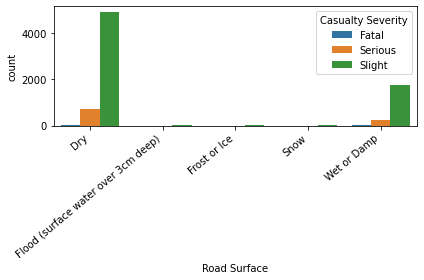

In [25]:
ax=sns.countplot(x=result["Road Surface"],hue=result["Casualty Severity"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

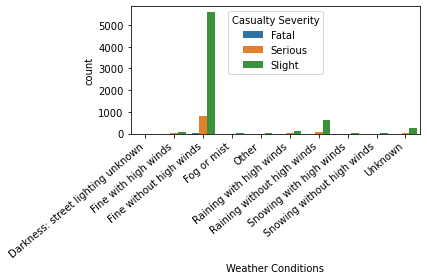

In [26]:
ax=sns.countplot(x=result["Weather Conditions"],hue=result["Casualty Severity"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

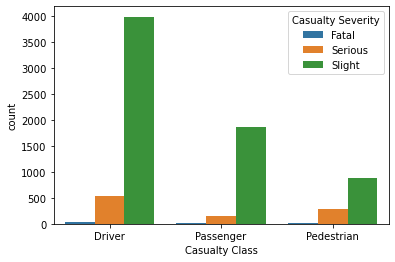

In [27]:
sns.countplot(x=result["Casualty Class"],hue=result["Casualty Severity"])

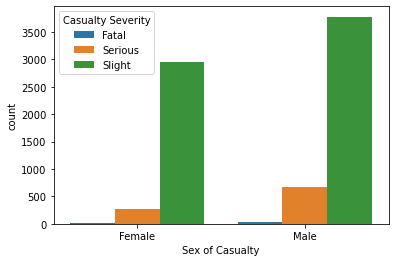

In [28]:
sns.countplot(x=result["Sex of Casualty"],hue=result["Casualty Severity"])

#### 2.1 FOR NUMERICAL : Numerical Attributes vs Casualty Severity : By BoxPlot

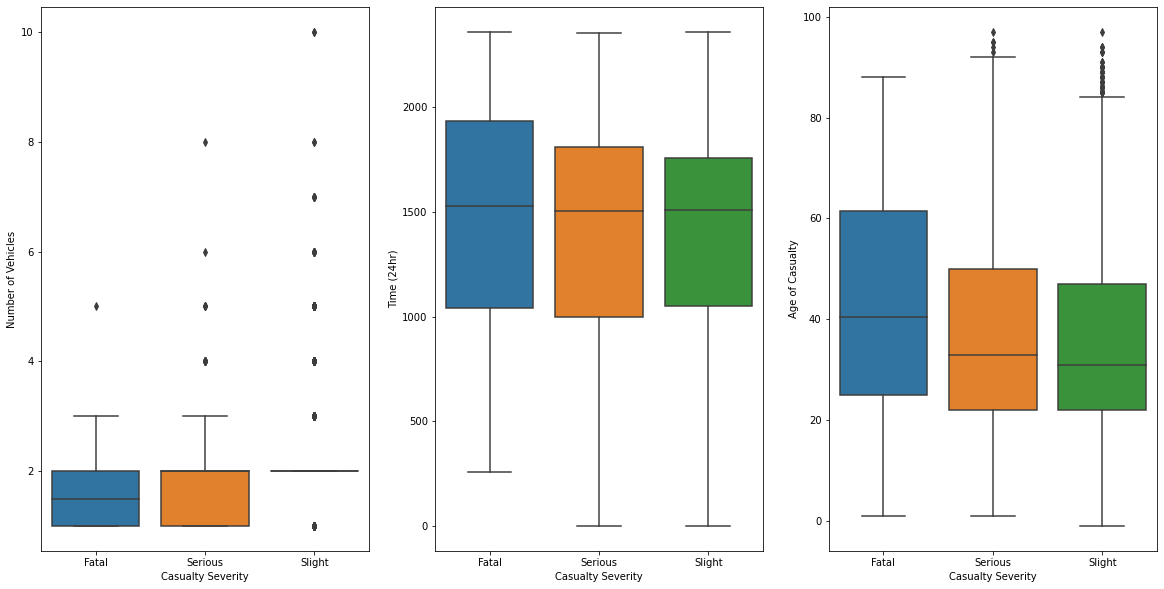

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for var, subplot in zip(num.columns.tolist(), ax.flatten()):
    sns.boxplot(x=result["Casualty Severity"], y=num[var], ax=subplot)

#### 2.2 Correlation plot of Independent numerical attributes

In [30]:
corr = num.corr()
corr

,Number of Vehicles,Time (24hr),Age of Casualty
Number of Vehicles,1.000000,0.012978,0.021763
Time (24hr),0.012978,1.000000,-0.054034
Age of Casualty,0.021763,-0.054034,1.000000


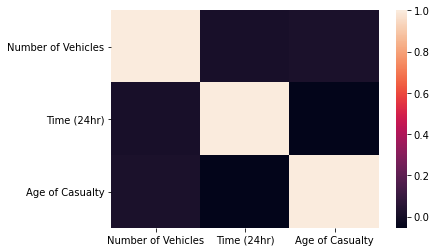

In [31]:
sns.heatmap(corr)

## Data Pre-processing

In [32]:
result= result.drop(['Reference Number','Expr1','Accident Date','1st Road Class'],axis=1)
result= result.dropna(axis=0)

In [33]:
result.head()

,Number of Vehicles,Day,Time (24hr),Road Surface,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1,Sunday,1840,Dry,Fine without high winds,Driver,Serious,Male,19,Car
1,1,Sunday,1840,Dry,Fine without high winds,Passenger,Serious,Male,19,Car
2,1,Saturday,130,Dry,Fine without high winds,Driver,Serious,Male,21,Car
3,1,Friday,235,Wet or Damp,Fine without high winds,Driver,Slight,Male,23,Car
4,2,Tuesday,240,Wet or Damp,Fine with high winds,Driver,Serious,Male,60,Goods vehicle 7.5 tonnes mgw and over


In [34]:
list1=['Monday','Tuesday','Wednesday','Thursday']
list2=['Friday','Saturday','Sunday']
list3=['Fine without high winds','Fine with high winds']
list4=['Snowing without high winds','Snowing with high winds']
list5=['Raining without high winds','Raining with high winds']
list6=['Fog or mist']
list7=['Minibus (8 to 16 passenger seats)','Bus or coach (17 or more passenger seats)']
list8=['Goods vehicle 3.5 tonnes mgw and under','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw','goods','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw']
list9=['Motorcycle over 50cc and up to 125cc','Motorcycle over 125cc and up to 500cc','M cycle 50cc and under','Motorcycle over 500cc','Motorcycle Unknown CC']
list10=['Car','Taxi or Private hire car']
list11=['Driver', 'Driver ']
list12=['Pedestrian'] 

In [35]:
def b(row):
    if row['Day']in list1:
        val='weekday'
    elif row['Day']in list2:
        val='weekend'
    return val
result['Day'] = result.apply(b, axis=1)

def e(row):
    if row['Weather Conditions']in list3:
        val='fine'
    elif row['Weather Conditions']in list4:
        val='snowing'
    elif row['Weather Conditions']in list5:
        val='raining'
    elif row['Weather Conditions']in list6:
        val='fog'
    else: 
        val='other'   
    return val
result['Weather Conditions'] = result.apply(e, axis=1)

def j(row):
    if row['Type of Vehicle']in list7:
        val='bus'
    elif row['Type of Vehicle']in list8:
        val='goods vehicle'
    elif row['Type of Vehicle']in list9:
        val='motorcycle'
    elif row['Type of Vehicle']in list10:
        val='car'
    else: 
        val='other'
    return val
result['Type of Vehicle'] = result.apply(j, axis=1)

def c(row):
    if 600< row['Time (24hr)'] <= 1801:
        val='Day-time'
    else:
        val='Night-time'
    return val
result['Time (24hr)'] = result.apply(c, axis=1)

def a(row):
    if row['Casualty Class']in list11:
        val='Driver'
    elif row['Casualty Class']in list12:
        val='Pedestrian'
    else: 
        val='Passenger'
    return val
result['Casualty Class'] = result.apply(a, axis=1)
result=pd.get_dummies(result,columns=['Day','Time (24hr)','Road Surface','Weather Conditions','Casualty Class','Sex of Casualty','Type of Vehicle'])

In [36]:
result.head(5)

,Number of Vehicles,Casualty Severity,Age of Casualty,Day_weekday,Day_weekend,Time (24hr)_Day-time,Time (24hr)_Night-time,Road Surface_Dry,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,...,Casualty Class_Driver,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Female,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle,Type of Vehicle_other
0,1,Serious,19,0,1,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
1,1,Serious,19,0,1,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0
2,1,Serious,21,0,1,0,1,1,0,0,...,1,0,0,0,1,0,1,0,0,0
3,1,Slight,23,0,1,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,2,Serious,60,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [37]:
result = result.drop(['Day_weekday', 'Time (24hr)_Day-time', 'Sex of Casualty_Female'] , axis=1)

In [38]:
result.columns

Index(['Number of Vehicles', 'Casualty Severity', 'Age of Casualty',
       'Day_weekend', 'Time (24hr)_Night-time', 'Road Surface_Dry',
       'Road Surface_Flood (surface water over 3cm deep)',
       'Road Surface_Frost or Ice', 'Road Surface_Snow',
       'Road Surface_Wet or Damp', 'Weather Conditions_fine',
       'Weather Conditions_fog', 'Weather Conditions_other',
       'Weather Conditions_raining', 'Weather Conditions_snowing',
       'Casualty Class_Driver', 'Casualty Class_Passenger',
       'Casualty Class_Pedestrian', 'Sex of Casualty_Male',
       'Type of Vehicle_bus', 'Type of Vehicle_car',
       'Type of Vehicle_goods vehicle', 'Type of Vehicle_motorcycle',
       'Type of Vehicle_other'],
      dtype='object')

## RE-SAMPLING

In [39]:
result['Casualty Severity'].value_counts()

Slight     6739
Serious     957
Fatal        48
Name: Casualty Severity, dtype: int64

In [40]:
seed=12345
np.random.seed(seed)

In [41]:
X = result.drop('Casualty Severity', axis=1)
y = result['Casualty Severity']

In [42]:
result.shape

(7744, 24)

In [43]:
array = ['Slight', 'Serious']
result_a=result.loc[result['Casualty Severity'].isin(array)]
X_a = result_a.drop('Casualty Severity', axis=1)
y_a = result_a['Casualty Severity']
sm = RandomUnderSampler()
X_a, y_a = sm.fit_sample(X_a, y_a)
label = list(X)
X_a=pd.DataFrame(data = X_a, columns = label)
y_a=pd.DataFrame(data = y_a, columns = ['Casualty Severity'])
result_b=pd.merge(y_a,X_a,right_index=True, left_index=True)
result_c=result.loc[result['Casualty Severity']=='Fatal']
cols=list(result_b)
result_c=result_c[cols]
result_d=pd.concat([result_b,result_c])
result_d['Casualty Severity'].value_counts()

C:\Users\hp\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Serious    957
Slight     957
Fatal       48
Name: Casualty Severity, dtype: int64

In [44]:
array = ['Fatal', 'Serious']
result_e=result_d.loc[result_d['Casualty Severity'].isin(array)]
X_e = result_e.drop('Casualty Severity', axis=1)
y_e = result_e['Casualty Severity']
sm = SMOTE()
X_e, y_e = sm.fit_sample(X_e, y_e)
X_d = result_d.drop('Casualty Severity', axis=1)
label = list(X_d)
X_e=pd.DataFrame(data = X_e, columns = label)
y_e=pd.DataFrame(data = y_e, columns = ['Casualty Severity'])
result_f=pd.merge(y_e,X_e,right_index=True, left_index=True)
result_g=result_d.loc[result_d['Casualty Severity']=='Slight']
cols=list(result_f)
result_g=result_g[cols]
result_h=pd.concat([result_f,result_g])
result_h['Casualty Severity'].value_counts()

C:\Users\hp\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fatal      957
Serious    957
Slight     957
Name: Casualty Severity, dtype: int64

In [45]:
X = result_h.drop('Casualty Severity', axis=1)
y = result_h['Casualty Severity']
result=result_h

## STANDARDIZATION AND PCA ANALYSIS

In [46]:
stdsc = StandardScaler() 
X_1 = stdsc.fit_transform(X)

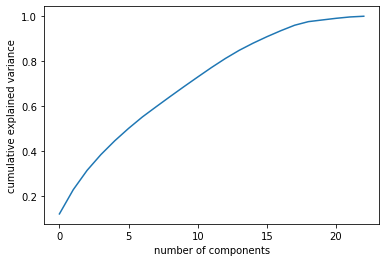

In [47]:
pca = PCA().fit(X_1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [48]:
pca = PCA(n_components=15)
X_2 = pca.fit_transform(X_1)


## K-Fold Cross Validation

In [49]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

## DECISION TREE

45.733280100658156
51.89907568718544
61.58318815331011
65.23978900503292
69.03600464576074
70.35919957413859
71.68275745257453
71.78644018583043
72.3793795973674
71.92641792489354
72.41398083623693
71.75292779713511
71.54386856368563
71.57834881920247
71.09078590785907
70.18522551296942
69.55828977932637
69.27954413472706
69.3491095625242
69.41831204026326
69.20973674022456
68.96595528455285
68.86130468447541
68.75677506775068
68.86130468447543
68.79125532326752
68.89566395663957
68.721447928765
68.61679732868757
68.65176151761518
68.58207510646534
68.58207510646534
68.58207510646534
68.58207510646534
68.58207510646534
68.58207510646534
68.58207510646534
68.58207510646534
68.58207510646534


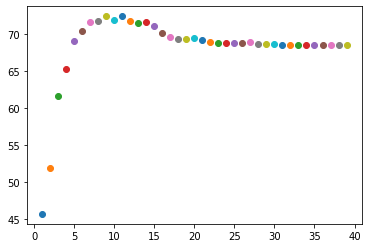

In [50]:
for i in range(1,40):
    tree = DecisionTreeClassifier(criterion='gini',max_depth=i ,random_state=1)  
    tree.fit(X, y) 
    y_pred =tree.predict(X)
    score = cross_val_score(tree, X, y, cv=kfold)
    mean=score.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [51]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=11,random_state=1)  
tree.fit(X, y) 
y_pred=tree.predict(X)

score = cross_val_score(tree, X, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score.mean()*100, score.std()*100))

mean accuracy 72.41% (standard deviation 2.50%)


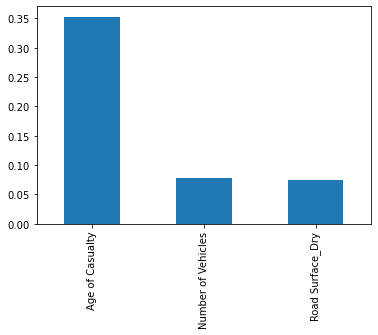

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
tree=ExtraTreesClassifier()
tree.fit(X,y)
df_new=pd.DataFrame(X)
feat_imp=pd.Series(tree.feature_importances_,index=df_new.columns)
feat_imp.nlargest(3).plot(kind='bar')
plt.show()

## RANDOM FOREST

In [53]:
y_forest=np.where(y=='Slight',0,np.where(y=='Serious',1,2))
y_forest=pd.DataFrame(data = y_forest, columns = ['Casualty Severity'])

In [54]:
forest = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=1, n_jobs=-1)
forest.fit(X, y_forest.values.ravel())
y_pred=forest.predict(X)

score1 = cross_val_score(forest, X, y_forest, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score1.mean()*100, score1.std()*100))

C:\Users\hp\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hp\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

mean accuracy 70.43% (standard deviation 2.43%)


## KNN

68.6864837398374
68.9653503677894
71.75280681378243
72.3793795973674
72.93783875338754
72.58916473093302
71.85661053039102
71.96101916376307
71.9267808749516
72.30884630274875
72.09978706929925
72.03070557491289
71.64718834688347
71.89084881920247
71.71675377468061
71.05497483546263
70.56729094076655
70.07996999612854
70.35823170731707
70.28842431281454
70.88087979094078
69.94035520712349
70.04476384049553
69.73141695702671
69.97568234610918
70.11457123499807
69.94108110723964
70.0803329461866
70.18486256291135
70.5330526519551
70.56801684088269
70.846762485482
70.8816056910569
71.0207365466512
70.84664150212932
70.88148470770422
70.8116773132017
70.98540940766551
70.53256871854433


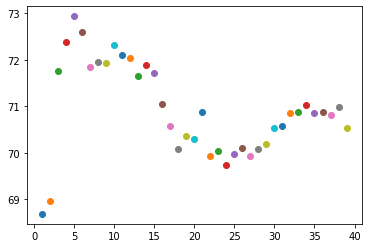

In [55]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, p=2,
                               metric='minkowski')
    knn.fit(X_2, y)
    results3 = cross_val_score(knn, X_2, y, cv=kfold)
    mean=results3.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [56]:
knn = KNeighborsClassifier(n_neighbors=7, p=2,
                               metric='minkowski')
knn.fit(X_2, y)

results3 = cross_val_score(knn, X_2, y, cv=kfold)

print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results3.mean()*100, results3.std()*100))

mean accuracy 71.86% (standard deviation 2.55%)


## LOGISTIC REGRESSION

In [57]:
X_3 = X.drop(['Weather Conditions_fine', 'Casualty Class_Driver', 'Type of Vehicle_other','Road Surface_Dry'], axis=1)

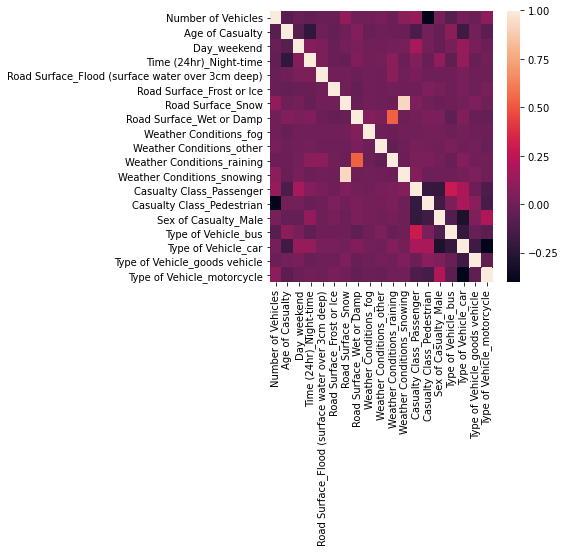

In [58]:
f, ax = plt.subplots(figsize=(5, 5))
corr = X_3.corr()
sns.heatmap(corr)
plt.show()

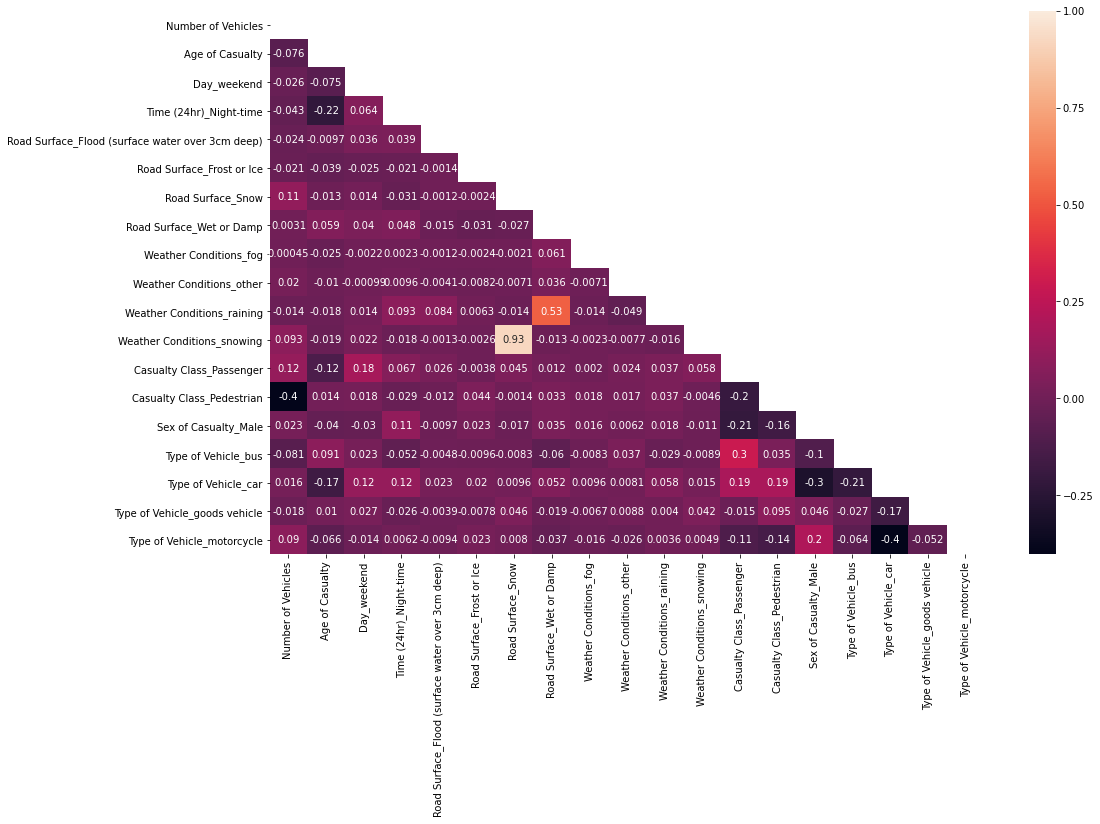

In [59]:
mask=np.zeros_like(corr)
indices=np.triu_indices_from(mask)
mask[indices]= True
plt.figure(figsize=(16,10))
sns.heatmap(corr,mask=mask,annot=True)
plt.show()

In [60]:
X_4 = X_3.drop(['Weather Conditions_raining',
 'Weather Conditions_snowing'], axis=1) 

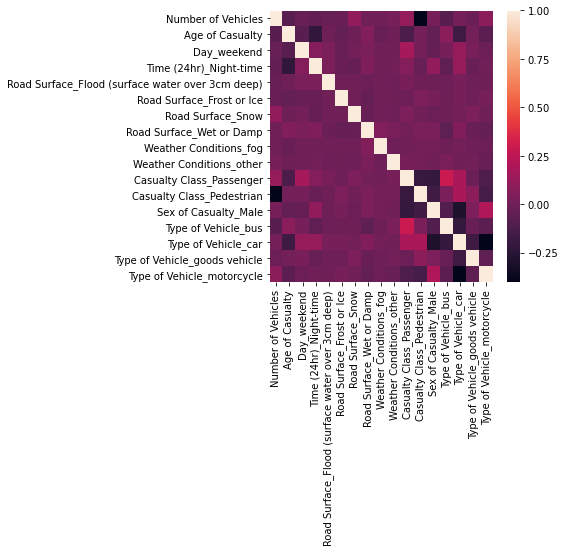

In [61]:
f, ax = plt.subplots(figsize=(5, 5))
corr = X_4.corr()
sns.heatmap(corr)
plt.show()

In [68]:
lr = LogisticRegression(C=0.5, random_state=1)
lr.fit(X_4, y)

results2 = cross_val_score(lr, X_4, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results2.mean()*100, results2.std()*100))

C:\Users\hp\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


mean accuracy 61.76% (standard deviation 2.89%)


C:\Users\hp\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## SUMMARY 

In [69]:
table = [["Decision Tree",round(score.mean()*100,2),round(score.std()*100,2)],
         ["Random Forest",round(score1.mean()*100,2),round(score1.std()*100,2)],
         ["KNN",round(results3.mean()*100,2) , round(results3.std()*100,2)],
         ["Logistic Regression", round(results2.mean()*100,2) , round(results2.std()*100,2)]]
display(HTML(tabulate.tabulate(table, headers=["Algorithm","Mean Accuracy", "Standard Deviation"], tablefmt='html')))

Algorithm,Mean Accuracy,Standard Deviation
Decision Tree,72.41,2.5
Random Forest,70.43,2.43
KNN,71.86,2.55
Logistic Regression,61.76,2.89


In [70]:
import pickle as pkl

In [65]:
pkl_out = open("train_classifier.pkl","wb")
pkl.dump(tree,pkl_out) 

In [ ]:
import requests
import json

URL = 'https://www.sms4india.com/api/v1/sendCampaign'

# get request
def sendPostRequest(reqUrl, apiKey, secretKey, useType, phoneNo, senderId, textMessage):
  req_params = {
  'apikey':apiKey,
  'secret':secretKey,
  'usetype':useType,
  'phone': phoneNo,
  'message':textMessage,
  'senderid':senderId
  }
  return requests.post(reqUrl, req_params)

# get response
response = sendPostRequest(URL, 'OGQEX48NXVI2QBJFF9MXWTKTCS7LY6UN', '6WVICFCD8IGRCW8M', 'stage', '8917475091', 'mohapatraniva@gmail.com', 'BE ALERT!' )
"""
  Note:-
    you must provide apikey, secretkey, usetype, mobile, senderid and message values
    and then requst to api
"""